In [1]:

# Unemployment Analysis with Python

#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv("Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(27)

In [6]:
# Remove duplicates
df = df.drop_duplicates()

In [7]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [8]:
# Standardize column names
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

In [9]:
df

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [10]:
# Convert 'date' column to datetime if available
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

C:\Users\Uzair Ahmed\AppData\Local\Temp\ipykernel_12348\317942824.py:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
C:\Users\Uzair Ahmed\AppData\Local\Temp\ipykernel_12348\317942824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [11]:
df

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


In [12]:
# Fill missing numeric values with mean
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

C:\Users\Uzair Ahmed\AppData\Local\Temp\ipykernel_12348\582333606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mean())


In [13]:
df

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


In [14]:
df.head()

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [15]:
# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

C:\Users\Uzair Ahmed\AppData\Local\Temp\ipykernel_12348\928659194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


In [16]:
df

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


In [18]:
df

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


In [19]:
df.describe()

,date,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%)
count,740,741.000000,7.410000e+02,741.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.660000,1.192616e+06,38.070000
50%,2019-11-30 00:00:00,8.370000,4.745178e+06,41.180000
75%,2020-03-31 00:00:00,15.880000,1.126583e+07,45.490000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.714052,8.082522e+06,8.105612


In [20]:
print(df.columns)


Index(['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'area'],
      dtype='object')


In [21]:
# # Automatically detect unemployment column name
# rate_col = [col for col in df.columns if 'unemploy' in col.lower()]
# if rate_col:
#     rate_col = rate_col[0]
#     print(f"✅ Detected unemployment rate column: {rate_col}")
# else:
#     raise ValueError("❌ Could not detect the unemployment rate column. Please check your dataset column names.")


C:\Users\Uzair Ahmed\AppData\Local\Temp\ipykernel_12348\1861868962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='estimated_unemployment_rate_(%)', data=df, palette='coolwarm')


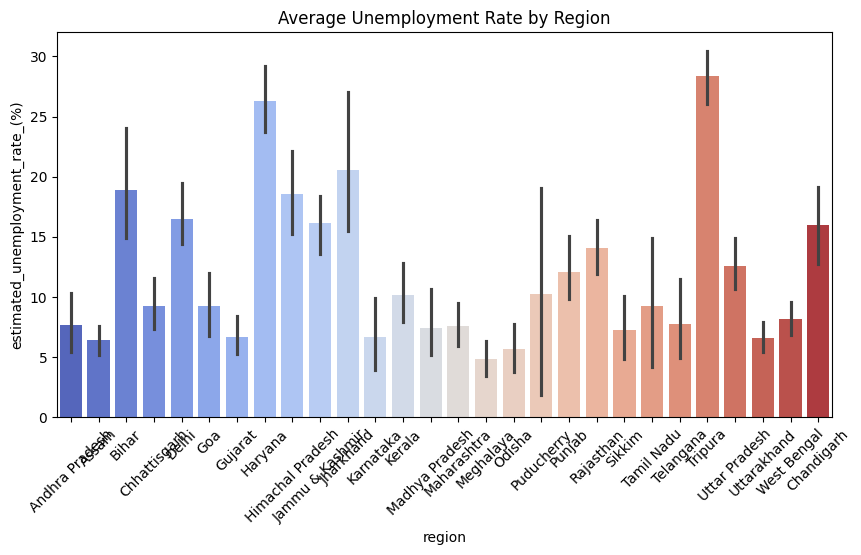

In [22]:
#  Data Visualization

# Average unemployment rate by region
if 'region' in df.columns:
    plt.figure(figsize=(10,5))
    sns.barplot(x='region', y='estimated_unemployment_rate_(%)', data=df, palette='coolwarm')
    plt.title('Average Unemployment Rate by Region')
    plt.xticks(rotation=45)
    plt.show()


In [23]:
df

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


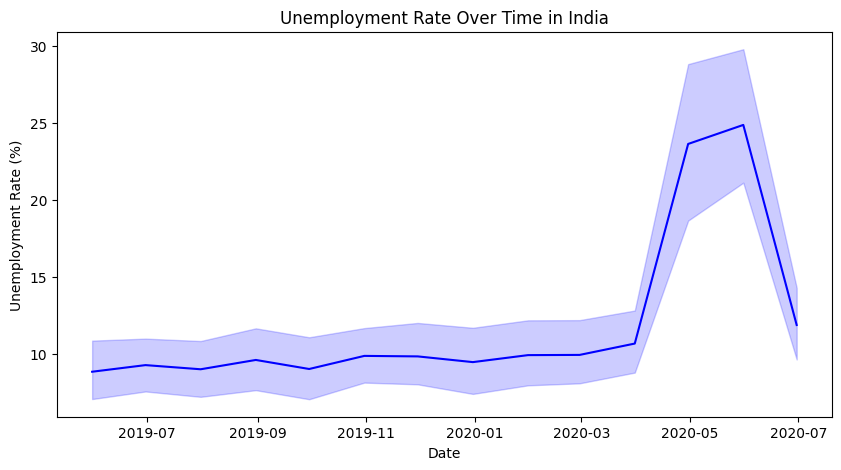

In [24]:
# Unemployment trend over time
if 'date' in df.columns:
    plt.figure(figsize=(10,5))
    sns.lineplot(x='date', y='estimated_unemployment_rate_(%)', data=df, color='blue')
    plt.title('Unemployment Rate Over Time in India')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate (%)')
    plt.show()

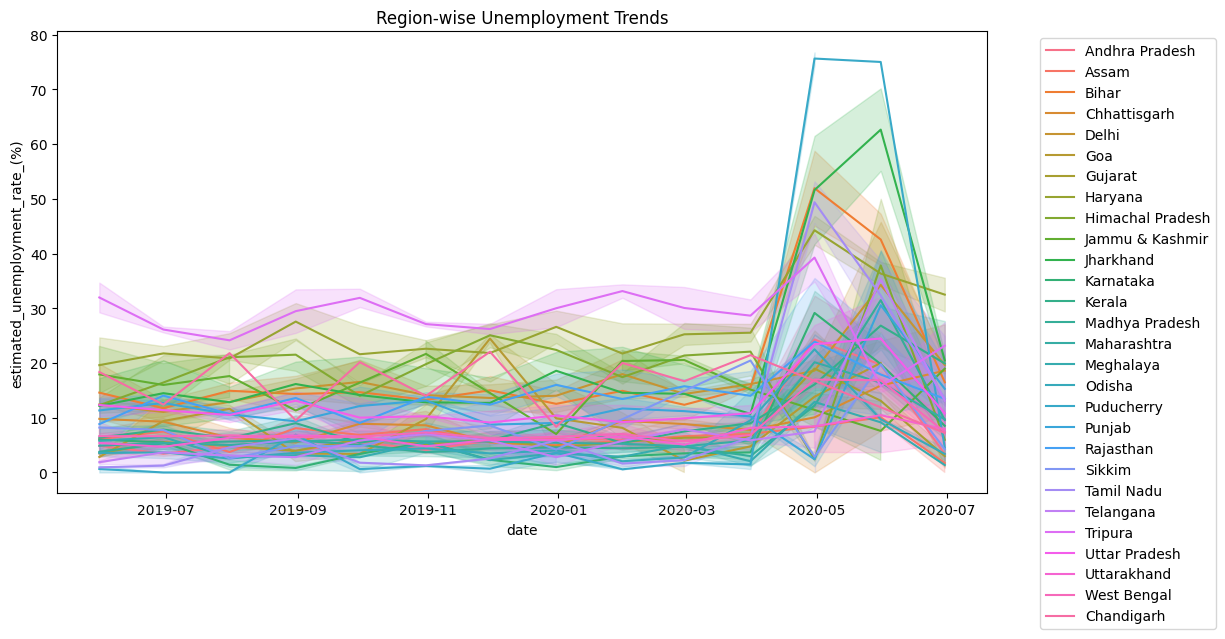

In [25]:
# Region-wise unemployment trends
if 'region' in df.columns and 'date' in df.columns:
    plt.figure(figsize=(12,6))
    sns.lineplot(x='date', y='estimated_unemployment_rate_(%)', hue='region', data=df)
    plt.title('Region-wise Unemployment Trends')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

C:\Users\Uzair Ahmed\AppData\Local\Temp\ipykernel_12348\3490844418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='area', y='estimated_unemployment_rate_(%)', data=df, palette='Set2')


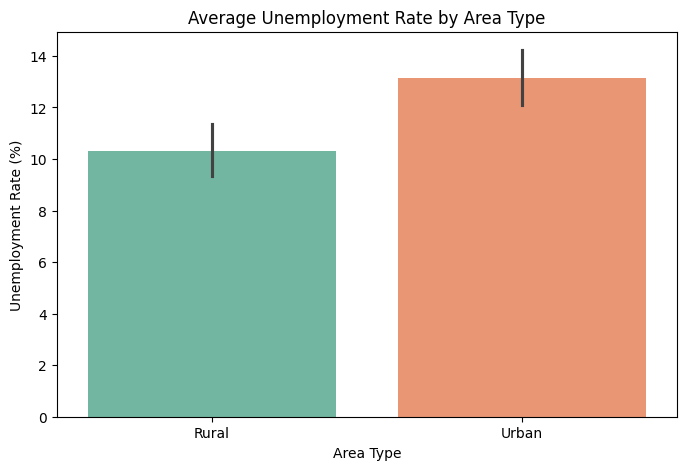

In [26]:
# Average unemployment rate by area (urban/rural)
if 'area' in df.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(x='area', y='estimated_unemployment_rate_(%)', data=df, palette='Set2')
    plt.title('Average Unemployment Rate by Area Type')
    plt.xlabel('Area Type')
    plt.ylabel('Unemployment Rate (%)')
    plt.show()

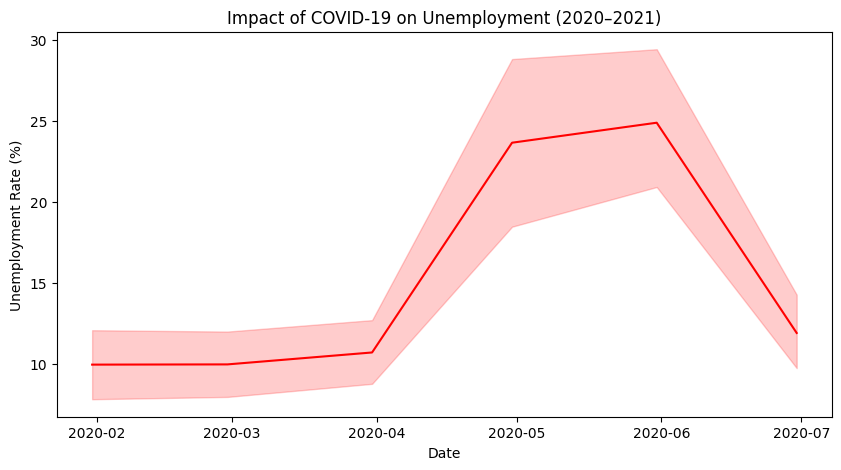

In [28]:
# COVID-19 impact (2020–2021)
if 'date' in df.columns:
    covid_df = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2021-12-31')]
    plt.figure(figsize=(10,5))
    sns.lineplot(x='date', y='estimated_unemployment_rate_(%)', data=covid_df, color='red')
    plt.title('Impact of COVID-19 on Unemployment (2020–2021)')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate (%)')
    plt.show()

C:\Users\Uzair Ahmed\AppData\Local\Temp\ipykernel_12348\2494316869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month_name()
C:\Users\Uzair Ahmed\AppData\Local\Temp\ipykernel_12348\2494316869.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_avg.index, y=month_avg.values, palette='mako')


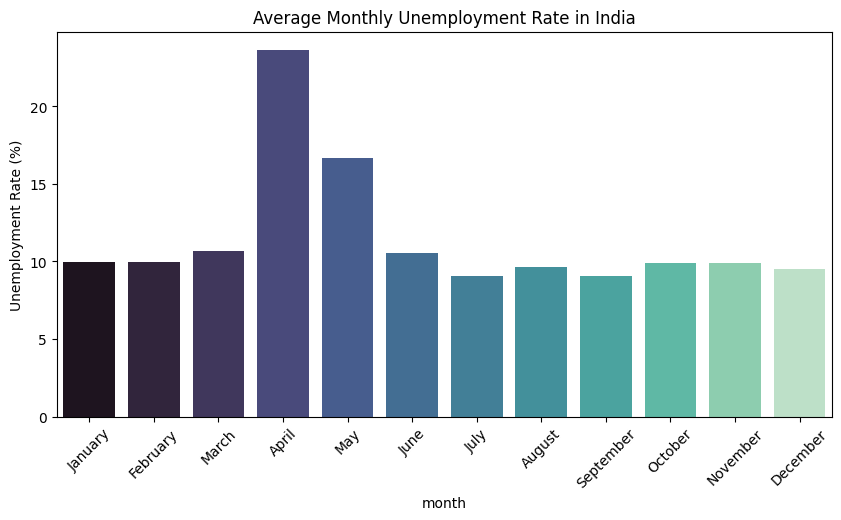

In [29]:
# Month-wise seasonal pattern
if 'date' in df.columns:
    df['month'] = df['date'].dt.month_name()
    month_avg = df.groupby('month')['estimated_unemployment_rate_(%)'].mean().reindex([
        'January','February','March','April','May','June','July','August','September','October','November','December'
    ])
    plt.figure(figsize=(10,5))
    sns.barplot(x=month_avg.index, y=month_avg.values, palette='mako')
    plt.title('Average Monthly Unemployment Rate in India')
    plt.xticks(rotation=45)
    plt.ylabel('Unemployment Rate (%)')
    plt.show()

In [34]:
# Insights 

print("\n KEY INSIGHTS:")
print(" :The unemployment rate rose sharply during the COVID-19 lockdown in early 2020.")
print(" :Urban areas faced higher unemployment compared to rural areas.")
print(" :Seasonal variation shows mid-year months with slightly higher unemployment.")
print(":The unemployment rate began stabilizing by late 2021, showing post-pandemic recovery.")
 



 KEY INSIGHTS:
 :The unemployment rate rose sharply during the COVID-19 lockdown in early 2020.
 :Urban areas faced higher unemployment compared to rural areas.
 :Seasonal variation shows mid-year months with slightly higher unemployment.
:The unemployment rate began stabilizing by late 2021, showing post-pandemic recovery.
